## Gather list of Files

In [1]:
title= 'Federal Circuit and Family Court of Australia - Division 2 Family Law'
target = 'https://www.austlii.edu.au/cgi-bin/viewtoc/au/cases/cth/FedCFamC2F/'
years=['2021', '2022', '2023', '2024', '2025']

In [4]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import time

url = target
headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36'
}
df = pd.DataFrame()

def scrapePage():
    response = requests.get(url, headers=headers)
    print(response.status_code)

    soup = BeautifulSoup(response.text, 'html.parser')
    cards = soup.find_all('div', class_='card')
    data = []
    for card in cards:
        ul = card.find('ul')
        
        for li in ul.find_all('li'):
            a = li.find('a')
            href = a.get('href')
            text = a.text.strip()
            data.append({'href': href, 'text': text})
    return data

# Append data to df
for year in years:
    url = target + year + '/'
    data = scrapePage()
    time.sleep(10)
    df = pd.concat([df, pd.DataFrame(data)], ignore_index=True)


print(df)

200
200


KeyboardInterrupt: 

In [193]:
df.to_csv(title + '.csv')

## Pull each individual page, chunk, and save to a DB

### Pull Page and save each to cleaned text file

In [242]:
import re

df = pd.read_csv('Federal Circuit and Family Court of Australia - Division 2 Family Law.csv')

base_url = 'https://www.austlii.edu.au/'

def scrape_raw(url):
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    article = soup.find('article')
    # Extract <p> and <blockquote> elements
    paragraphs = article.find_all(['p', 'blockquote'])
    # Extract text from each element
    seen = set()
    text = [line for line in [re.sub(r'\s+', ' ', elem.get_text()) for elem in paragraphs] if line.strip() != '' and not (line in seen or seen.add(line))]
    text = [line.lower() for line in text]
    return text

def clean_text(text):
    chunks = []
    current_chunk = ""
    for line in text:
        if line.startswith("(") or line.startswith(" (") or line.startswith(" ["):
            current_chunk += " " + line[4:]
            if current_chunk.startswith(" "):
                current_chunk = current_chunk[1:]
        else:
            if current_chunk:
                chunks.append(current_chunk.strip().replace(';', ','))
            current_chunk = line

    if current_chunk:
         chunks.append(current_chunk.strip())
    return '\n'.join(chunks)
    
# loop row by row trough df

for index, row in df.iterrows():
    if index < 1271: continue
    url = base_url + row['href']
    raw_text = scrape_raw(url)
    cleaned_text = clean_text(raw_text)
    with open(str(index) + '.txt', 'w', encoding='utf-8', errors='replace') as f:
        f.write(cleaned_text)
    print(str(index) + '-' + str(len(cleaned_text)), end=',')
    time.sleep(10)

    

1271-9559,1272-14885,1273-47076,1274-70238,1275-34602,1276-24294,1277-20506,1278-94020,1279-61061,1280-6036,1281-4054,1282-2635,1283-147578,1284-74259,1285-18363,1286-20066,1287-46752,1288-62717,1289-4199,1290-29970,1291-26130,1292-24016,1293-2393,1294-3453,1295-6128,1296-8185,1297-293,1298-30980,1299-110565,1300-23234,1301-77548,1302-88583,1303-277,1304-121968,1305-69109,1306-4263,1307-50229,1308-20058,1309-5673,1310-20171,1311-415,1312-37266,1313-186608,1314-7478,1315-21699,1316-36902,1317-4690,1318-31155,1319-38375,1320-20803,1321-18946,1322-31598,1323-2338,1324-7058,1325-30500,1326-272,1327-8412,1328-6205,1329-3748,1330-12117,1331-10452,1332-105240,1333-22044,1334-54624,1335-7099,1336-36680,1337-99125,1338-314,1339-88062,1340-22231,1341-23179,1342-16596,1343-4986,1344-36485,1345-25401,1346-526,1347-6279,1348-35280,1349-4450,1350-27513,1351-4147,1352-2634,1353-83694,1354-14700,1355-13475,1356-16514,1357-115483,1358-26822,1359-66247,1360-50885,1361-22061,1362-13610,1363-14716,1364-43

## Anaylze File Sizes

In [2]:
import pandas as pd
import os

# Initialize an empty list to store file lengths
file_lengths = []

# Loop through each file in the "documents" subdirectory
for filename in os.listdir('documents'):
    # Check if the file is a .txt file
    if filename.endswith(".txt"):
        # Extract the file number from the filename
        file_number = int(filename.split('.')[0])
        # Open the file with utf-8 encoding and ignore decoding errors
        with open(os.path.join('documents', filename), 'r', encoding='utf-8', errors='ignore') as file:
            length = len(file.read())
        # Append the filename and length to the list
        file_lengths.append([file_number, length])

# Convert the list to a Pandas DataFrame and set the index to the file number
df = pd.DataFrame(file_lengths, columns=['File Number', 'Length']).set_index('File Number')

df

,Length
File Number,
0,43410
1,35462
10,34929
100,76322
1000,10034
...,...
992,7077
994,9869
995,9038


In [3]:
import pandas as pd
import os
import numpy as np

# Initialize an empty list to store file lengths
file_lengths = []

# Loop through each file in the "documents" subdirectory
for filename in os.listdir('documents'):
    # Check if the file is a .txt file
    if filename.endswith(".txt"):
        # Extract the file number from the filename
        file_number = int(filename.split('.')[0])
        # Open the file with utf-8 encoding and ignore decoding errors
        with open(os.path.join('documents', filename), 'r', encoding='utf-8', errors='ignore') as file:
            length = len(file.read())
        # Append the filename and length to the list
        file_lengths.append([file_number, length])

# Convert the list to a Pandas DataFrame and set the index to the file number
df = pd.DataFrame(file_lengths, columns=['File Number', 'Length']).set_index('File Number')

# Calculate statistics
stats = {
    'Mean Length': np.mean(df['Length']),
    'Median Length': np.median(df['Length']),
    'Min Length': np.min(df['Length']),
    'Max Length': np.max(df['Length']),
    'Standard Deviation': np.std(df['Length']),
    'Total Files': len(df)
}

# Create a DataFrame for the statistics
stats_df = pd.DataFrame.from_dict(stats, orient='index', columns=['Value'])

# Print the original DataFrame and the statistics
print("File Lengths:")
print(df)
print("\nStatistics:")
print(stats_df)

# Optionally, you can save these to CSV files
df.to_csv('file_lengths.csv')
stats_df.to_csv('file_length_statistics.csv')

File Lengths:
             Length
File Number        
0             43410
1             35462
10            34929
100           76322
1000          10034
...             ...
992            7077
994            9869
995            9038
996            9521
998           12300

[1283 rows x 1 columns]

Statistics:
                           Value
Mean Length         5.439813e+04
Median Length       3.286100e+04
Min Length          5.010000e+03
Max Length          1.224248e+06
Standard Deviation  7.232297e+04
Total Files         1.283000e+03


In [1]:
import matplotlib.pyplot as plt

# Histogram: Plot the distribution of file lengths
df['Length'].hist(bins=50)
plt.title('Distribution of File Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

NameError: name 'df' is not defined

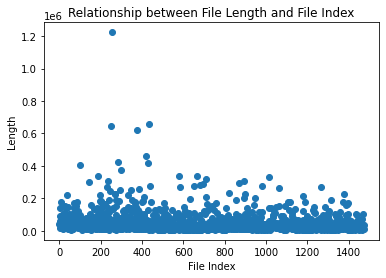

In [277]:
# Scatter Plot: Visualize the relationship between file length and file index
plt.scatter(df.index, df['Length'])
plt.title('Relationship between File Length and File Index')
plt.xlabel('File Index')
plt.ylabel('Length')
plt.show()

In [278]:
# Delete files with less than 5000 characters
files_to_delete = df[df['Length'] < 5000].index.tolist()

for file_number in files_to_delete:
    filename = f"{file_number}.txt"
    os.remove(os.path.join('documents', filename))

print(f"Deleted {len(files_to_delete)} files")

Deleted 0 files


In [292]:
import re
import os

# Create a directory for cleaned files if it doesn't exist
cleaned_dir = "cleaned_documents"
if not os.path.exists(cleaned_dir):
    os.makedirs(cleaned_dir)

for i in range(1474):  # loop through files 0.txt to 1473.txt
    print(f"Processing file {i}.txt")
    filename = f"{i}.txt"
    file_path = os.path.join("documents", filename)  # specify the subdirectory
    print(f"Processing file {file_path}")
    
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        text = file.read()
        
        cleaned_text = re.sub(r'\n\d+ ', '', text)  # clean the text
        
        cleaned_file_path = os.path.join(cleaned_dir, filename)  # specify the cleaned directory
        with open(cleaned_file_path, 'w') as cleaned_file:  # open a new file in write mode
            cleaned_file.write(cleaned_text)  # write the cleaned text to the new file

        print(f"Cleaned and saved {filename}")

Processing file 0.txt
Processing file documents\0.txt
Cleaned and saved 0.txt
Processing file 1.txt
Processing file documents\1.txt
Cleaned and saved 1.txt
Processing file 2.txt
Processing file documents\2.txt
Cleaned and saved 2.txt
Processing file 3.txt
Processing file documents\3.txt
Cleaned and saved 3.txt
Processing file 4.txt
Processing file documents\4.txt
Cleaned and saved 4.txt
Processing file 5.txt
Processing file documents\5.txt
Cleaned and saved 5.txt
Processing file 6.txt
Processing file documents\6.txt
Cleaned and saved 6.txt
Processing file 7.txt
Processing file documents\7.txt
Cleaned and saved 7.txt
Processing file 8.txt
Processing file documents\8.txt


FileNotFoundError: [Errno 2] No such file or directory: 'documents\\8.txt'

Empty DataFrame
Columns: [Length]
Index: []
